# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [39]:
# Your code here. 
import pandas as pd
x_values= [17,51,27,21,36,48,19,26,54,30]
y_values = [10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame({'X': x_values, 'Y': y_values})

In [40]:
student_data.reset_index(inplace=True)

In [41]:
student_data.rename(columns={'index': 'StudentID', 'X': 'Age', 'Y':'Tardies'},inplace=True)
student_data.set_index('StudentID',inplace=True)

Draw a dispersion diagram (scatter plot) for the data.

In [42]:
student_data

,Age,Tardies
StudentID,,
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0


<AxesSubplot:xlabel='Age', ylabel='Tardies'>

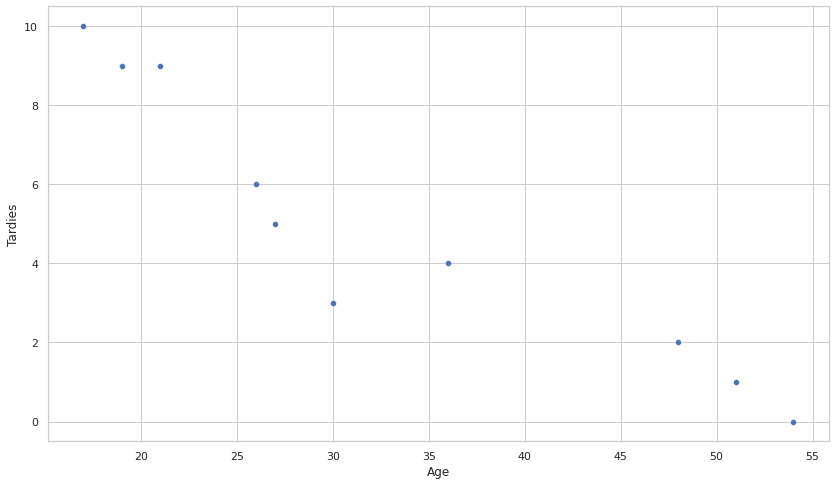

In [44]:
# Your code here.
import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (14., 8.)})
sns.set_style('whitegrid')

sns.scatterplot(x=student_data['Age'], y=student_data['Tardies'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

There is an inverse proportional relation. I guess the relationship is as follows:

Tardies = 26 -0.5*Age

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [48]:
# Your response here.
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [ ]:
#La correlación indica el porcentaje de variación de una variable cuando varía la otra. Al ser cercano a uno, la relación es fuerte

In [50]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [ ]:
#En la covarianza importa el signo, ya que indica si las variables varían en la misma dirección, al ser negativa (-45,57), 
#la relación es inversamente proiporcional

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [66]:
# Your response here.
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()
lr.fit(
    X = student_data[['Age']] , #siempre es un dataframe por eso pongo doble corchete
    y = student_data.Tardies#es una serie de pandas
)

#The outcome will be two constants, one that tells the vale of Tardies when Age=0, and the other indicate sthe slope
#This is a linear regression

LinearRegression()

In [67]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
print(beta_1, beta_0)

-0.2428207709159808 12.888803363135768


In [68]:
student_data['Prediction']=beta_0 + beta_1 * student_data.Age
student_data

,Age,Tardies,Prediction
StudentID,,,
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518


Plot your regression model on your scatter plot.

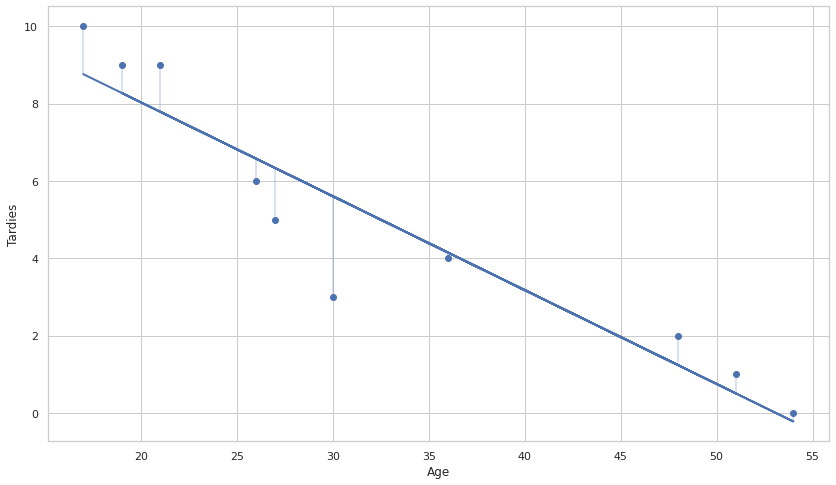

In [70]:
from matplotlib import pyplot as plt
linea = beta_0 + beta_1 * student_data.Age
plt.scatter(student_data["Age"],student_data.Tardies)
plt.plot(student_data["Age"],linea, lw=2)
plt.vlines(student_data["Age"],linea,student_data.Tardies, lw=0.4)
plt.xlabel("Age")
plt.ylabel("Tardies");

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [71]:
# Your response here. 
# 
results = smf.ols("Age ~ Tardies", data = student_data).fit()
results.summary()

#Tardies are a good predictor of age R2 adjusted= 0.867 and p-value = 0.000

/home/cleonortiz/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           5.57e-05
Time:                        16:50:32   Log-Likelihood:                -29.149
No. Observations:                  10   AIC:                             62.30
Df Residuals:                       8   BIC:                             62.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.6988      2.791     18.168      0.000      44.264      57.134
Tardies       -3.6324      0.470     -7.734      0.000      -4.716      -2.549
==============================================================================
Omnibus:                        3.472   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                1.714
Skew:                          -1.010   Prob(JB):                        0.424
Kurtosis:                       2.812   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [72]:
# Import any libraries you may need & the data

vehicules = pd.read_csv('vehicles.csv')

In [74]:
vehicules.sample(5)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
1367,Audi,TT Roadster quattro,2008,3.2,6.0,Automatic (S6),4-Wheel or All-Wheel Drive,Two Seaters,Premium,16.480500,18,24,20,444.350000,2000
4408,Chevrolet,Avalanche 1500 2WD,2004,5.3,8.0,Automatic 4-spd,Rear-Wheel Drive,Sport Utility Vehicle - 2WD,Regular,21.974000,14,18,15,592.466667,2200
21542,Lincoln,Continental,1993,3.8,6.0,Automatic 4-spd,Front-Wheel Drive,Large Cars,Regular,18.311667,15,24,18,493.722222,1850
13732,Ford,Probe,1995,2.5,6.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Premium,16.480500,18,24,20,444.350000,2000
27619,Oldsmobile,Ninety-Eight,1995,3.8,6.0,Automatic 4-spd,Front-Wheel Drive,Large Cars,Regular,16.480500,17,26,20,444.350000,1650


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [84]:
# Your response here. 

v2 = vehicules[['Year','Cylinders','Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

In [85]:
v2.sample(5)

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
15514,2008,8.0,23.543571,14,2400,634.785714
18523,2009,6.0,17.347895,19,2150,467.736842
33437,2015,8.0,23.543571,14,2400,617.000000
846,2014,4.0,12.677308,26,1550,343.000000
35142,2015,6.0,16.616739,23,1550,442.000000


In [86]:
v2.corr()
#Fuel Barrels/Year is the most important variable, while Year is the least important

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


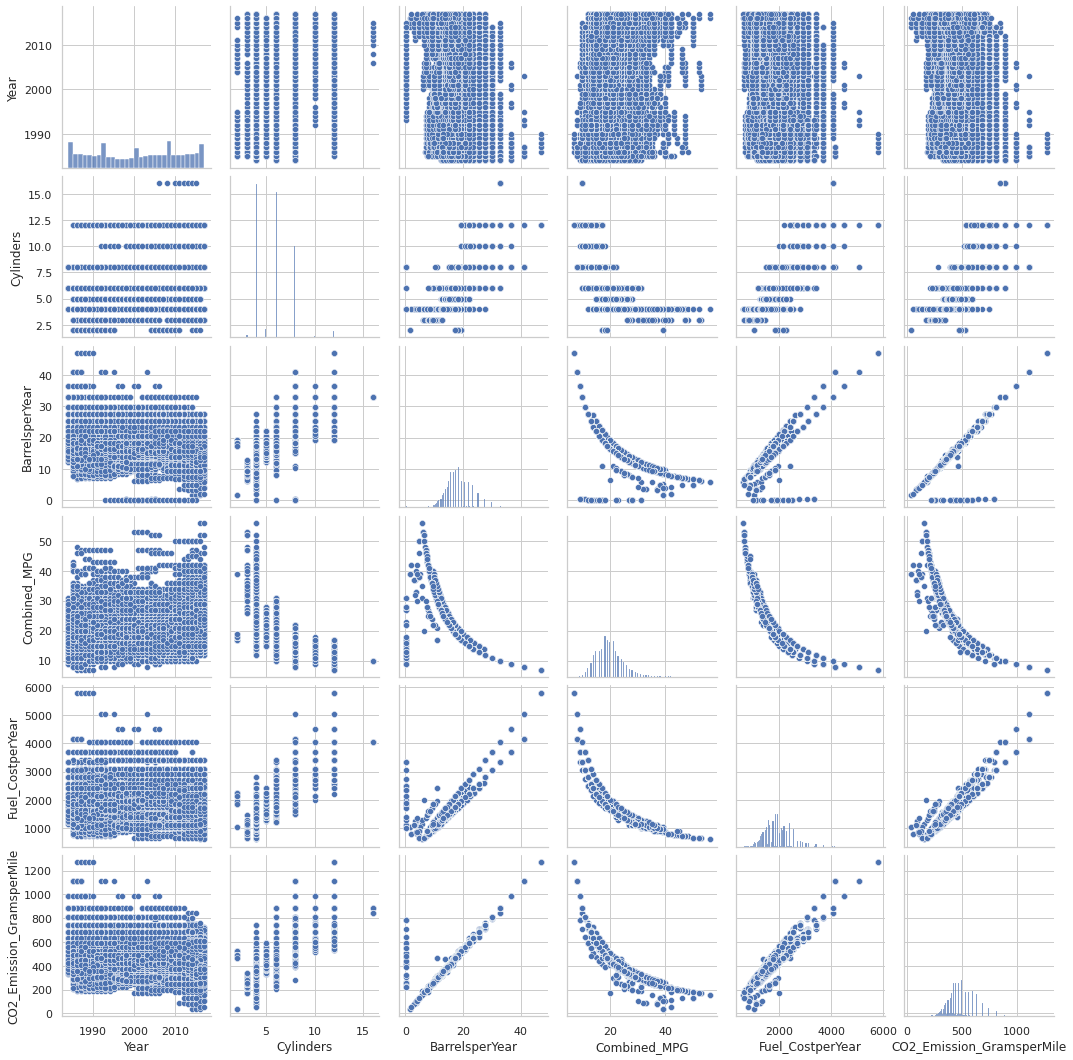

In [89]:
sns.pairplot(v2)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [87]:
# Your response here. 
v2.rename(columns={'Fuel Barrels/Year':'BarrelsperYear','Combined MPG': 'Combined_MPG', 'Fuel Cost/Year' : 'Fuel_CostperYear', 'CO2 Emission Grams/Mile': 'CO2_Emission_GramsperMile'}, inplace=True)

/home/cleonortiz/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [88]:
results = smf.ols("CO2_Emission_GramsperMile ~ Fuel_CostperYear + Combined_MPG + BarrelsperYear + Year + Cylinders", data = v2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     CO2_Emission_GramsperMile   R-squared:                       0.981
Model:                                   OLS   Adj. R-squared:                  0.981
Method:                        Least Squares   F-statistic:                 3.687e+05
Date:                       Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                               17:27:52   Log-Likelihood:            -1.5173e+05
No. Observations:                      35952   AIC:                         3.035e+05
Df Residuals:                          35946   BIC:                         3.035e+05
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          769.8883     19.392     39.702      0.000     731.880     807.897
Fuel_CostperYear     0.0323      0.000     67.025      0.000       0.031       0.033
Combined_MPG        -3.0404      0.042    -71.645      0.000      -3.124      -2.957
BarrelsperYear      19.0529      0.061    311.600      0.000      18.933      19.173
Year                -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders            1.8788      0.083     22.598      0.000       1.716       2.042
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Your response here. 

#I'm using a multiple regression model using all the variables that I have. 
#The adjusted R2 is the same as R2, so there are no variables that add no extra information, so I'm going to keep them all
# R2 adjusted is also 0.981, that is a pretty high value so we can be confident on predictions given by this model
# p-values for every variable are lower than 0.05, so they are all meaningful
# The most important variable is Fuel Barrels per year, as its coeficient is the biggest

# CO2 emissions = 769.89 + 0.03*Fuel_costperyear -3.04*Combined_MPG + 19.05*Barrelsperyear-0.32*Year+1.88*Cylinders

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [91]:
# Your code here. 
x_values= [1,3,4,6,8,9,11,14]
y_values = [1,2,4,4,5,7,8,13]
party = pd.DataFrame({'Invited': x_values, 'Attended': y_values})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='Invited', ylabel='Attended'>

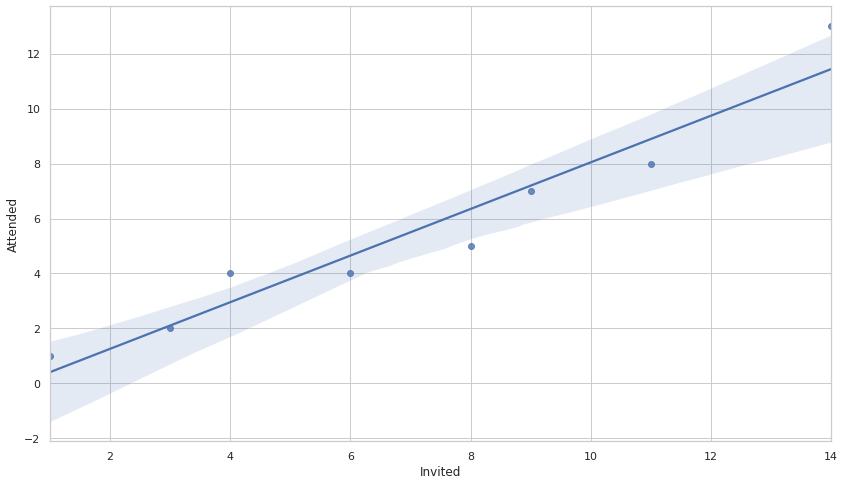

In [93]:
# Your code here.
sns.regplot(x=party.Invited, y=party.Attended)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 